In [1073]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from esda.moran import Moran
from esda.geary import Geary
from esda.getisord import G, G_Local
from pysal.lib import weights
from splot.esda import moran_scatterplot
from libpysal.weights import DistanceBand
from libpysal.weights import KNN

Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski
- Projekt 2 z przedmiotu Ekonometrii Przestrzennej

In [1074]:
woj = pd.read_csv("przestepstwa.csv")
pow = pd.read_csv("przestepstwa_pow.csv")
pow_map = "powiaty.shp"
pow_m = gpd.read_file(pow_map)

In [1075]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [1076]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [1077]:
woj.describe()

,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [1078]:
woj.dtypes

JPT_NAZWA_                                                                                                                                                 object
Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem    float64
dtype: object

In [1079]:
pow

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem
0,7,11212210000,nowosądecki,1549.0,2020,1210,powiat,12,małopolskie,11958.0
1,2,11212416000,tarnowski,1412.0,2020,1216,powiat,12,małopolskie,2860.0
2,5,20811301000,gorzowski,1214.0,2020,801,powiat,8,lubuskie,1108.0
3,40,23015810000,koniński,1578.0,2020,3010,powiat,30,wielkopolskie,1163.0
4,13,23016121000,poznański,1900.0,2020,3021,powiat,30,wielkopolskie,5260.0
...,...,...,...,...,...,...,...,...,...,...
375,39,71427126000,siedlecki,1603.0,2020,1426,powiat,14,mazowieckie,766.0
376,377,71427129000,sokołowski,1131.0,2020,1429,powiat,14,mazowieckie,919.0
377,378,71427133000,węgrowski,1221.0,2020,1433,powiat,14,mazowieckie,807.0
378,379,71427328000,sochaczewski,735.0,2020,1428,powiat,14,mazowieckie,1419.0


In [1080]:
pow.drop(['oid', 'kod KTS', 'Województwo', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow

,JPT_NAZWA_,Przestępstwa_powiaty
0,nowosądecki,11958.0
1,tarnowski,2860.0
2,gorzowski,1108.0
3,koniński,1163.0
4,poznański,5260.0
...,...,...
375,siedlecki,766.0
376,sokołowski,919.0
377,węgrowski,807.0
378,sochaczewski,1419.0


In [1081]:
pow.describe()

,Przestępstwa_powiaty
count,380.000000
mean,2014.231579
std,3182.327268
min,239.000000
25%,839.500000
50%,1271.500000
75%,2014.500000
max,45754.000000


In [1082]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [1083]:
pow_m['JPT_NAZWA_'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [1084]:
file_path = 'ludnosc.csv'


df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() 


ludnosc_pow = pd.DataFrame({
    'JPT_NAZWA_': df['Powiaty'],
    'Ludnosc_powiaty': df['Ludnosc']
})


print(ludnosc_pow)

            JPT_NAZWA_  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [1085]:
print(pow)

       JPT_NAZWA_  Przestępstwa_powiaty
0     nowosądecki               11958.0
1       tarnowski                2860.0
2       gorzowski                1108.0
3        koniński                1163.0
4       poznański                5260.0
..            ...                   ...
375     siedlecki                 766.0
376    sokołowski                 919.0
377     węgrowski                 807.0
378  sochaczewski                1419.0
379   żyrardowski                1603.0

[380 rows x 2 columns]


In [1086]:
pow['JPT_NAZWA_'] = pow['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [1087]:
merged_df = pow.merge(ludnosc_pow, on='JPT_NAZWA_')

In [1088]:
merged_df['Przestępstwa_średnia_powiaty'] = (merged_df['Przestępstwa_powiaty'] / merged_df['Ludnosc_powiaty'])

In [1089]:
print(merged_df[['JPT_NAZWA_', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

       JPT_NAZWA_  Przestępstwa_powiaty  Ludnosc_powiaty  \
0     nowosądecki               11958.0           216796   
1       tarnowski                2860.0           201497   
2       gorzowski                1108.0            71836   
3        koniński                1163.0           130053   
4       poznański                5260.0           399272   
..            ...                   ...              ...   
395     siedlecki                 766.0            81362   
396    sokołowski                 919.0            53804   
397     węgrowski                 807.0            65822   
398  sochaczewski                1419.0            85045   
399   żyrardowski                1603.0            75749   

     Przestępstwa_średnia_powiaty  
0                        0.055158  
1                        0.014194  
2                        0.015424  
3                        0.008943  
4                        0.013174  
..                            ...  
395                      0.

In [1090]:
pow = merged_df[['JPT_NAZWA_', 'Przestępstwa_średnia_powiaty']]
print(pow)

       JPT_NAZWA_  Przestępstwa_średnia_powiaty
0     nowosądecki                      0.055158
1       tarnowski                      0.014194
2       gorzowski                      0.015424
3        koniński                      0.008943
4       poznański                      0.013174
..            ...                           ...
395     siedlecki                      0.009415
396    sokołowski                      0.017081
397     węgrowski                      0.012260
398  sochaczewski                      0.016685
399   żyrardowski                      0.021162

[400 rows x 2 columns]


In [1091]:
print(pow.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

          JPT_NAZWA_  Przestępstwa_średnia_powiaty
44            Krosno                      0.182498
15   Piekary Śląskie                      0.150790
39       Ruda Śląska                      0.091868
243          gdański                      0.055558
0        nowosądecki                      0.055158
..               ...                           ...
340        przemyski                      0.007183
346      strzyżowski                      0.006646
30           opolski                      0.006401
201        świdnicki                      0.004964
84           bielski                      0.003832

[400 rows x 2 columns]


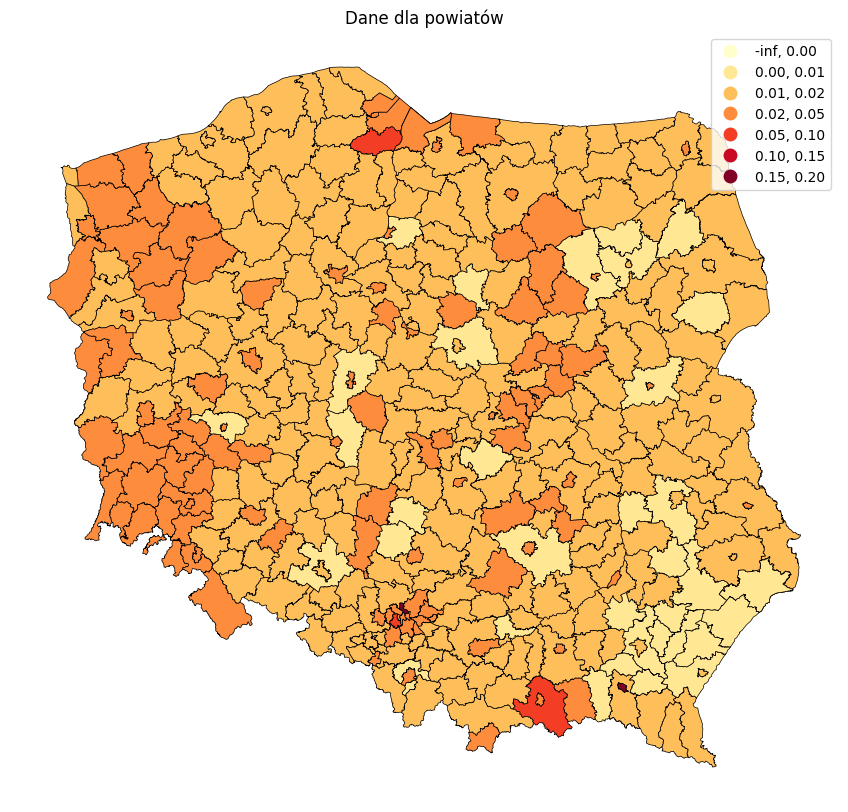

In [1092]:
merged_pow = pow_m.merge(pow, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow['Kategoria'] = np.digitize(
    merged_pow['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów')
plt.show()

In [1093]:
#Analiza przy użyciu binarnej macierzy sąsiedztwa 

In [1094]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow)
w.transform = 'r'

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\401519068.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow)


('WARNING: ', 274, ' is an island (no neighbors)')


c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 274.
  W.__init__(self, neighbors, ids=ids, **kw)


In [1095]:
y = merged_pow[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: 0.09657896342641314
E(I): -0.00228310502283105
Var(I): 0.0008340830568668548
Z(I): 3.4231430095671778
p-value: 0.0006190150114729648


In [1096]:
geary_pow = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)         

Geary's C: 0.8083744371413427
E(C): 1.0
Var(C): 0.0011348124581800488
Z(C): -5.688416612280592
p-value: 6.411134867236472e-09


In [1097]:
g_pow = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)              

G: 0.0146668844621921
E(G): 0.015342049697839632
Var(G): 2.4216084391163735e-07
Z(G): -1.3720126373469748
p-value: 0.08502975189135165


In [1098]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)


Local G* values: [ 1.06521565e+00  1.19051065e+00  1.12158673e+00  1.21858534e+00
  1.06264510e-01  2.31703636e-01  1.62984813e-01  2.59500713e-01
  1.71063419e-01  6.48100462e-02 -2.82822446e-01 -1.75424779e-01
 -1.09378469e-01 -2.65889905e-01 -5.69253367e-02 -1.35745100e-02
 -9.28120828e-03  2.14579445e-01 -3.60020387e-01  1.19786036e-01
  7.60267848e-01 -3.12814151e-01  9.29563571e-03 -1.34565892e-01
 -2.51894079e-01 -5.51894694e-01 -3.85926147e-01  4.85992725e-02
 -8.90457260e-01 -3.05195689e-01 -3.69085337e-01  1.74821434e-01
 -2.26947690e-02 -1.23606095e-01 -1.79967691e-01 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -3.43431139e-01
 -6.71390487e-02 -2.80501036e-02  3.55119683e-02 -2.60469237e-01
  6.18359334e-02  3.20917754e+00 -2.19620944e-01  2.68027364e+00
  5.61504096e-01  1.60897742e-01 -2.30399167e-02  4.98607541e-01
 -2.81565505e-01 -2.29322744e-01 -3.10859651e-01 -1.30756034e-01
 -2.32288989e-01 -5.96360375e-01 -1.30634245e-01 -1.47405769e-01
  2.3378

c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


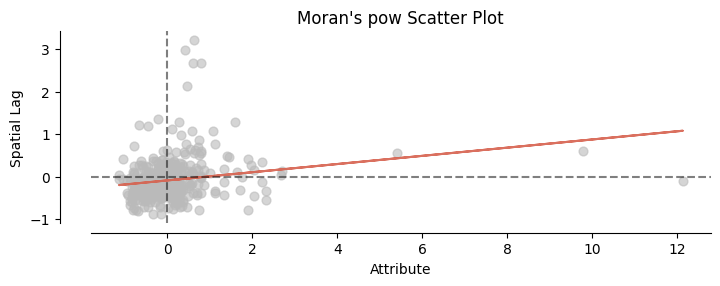

In [1099]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

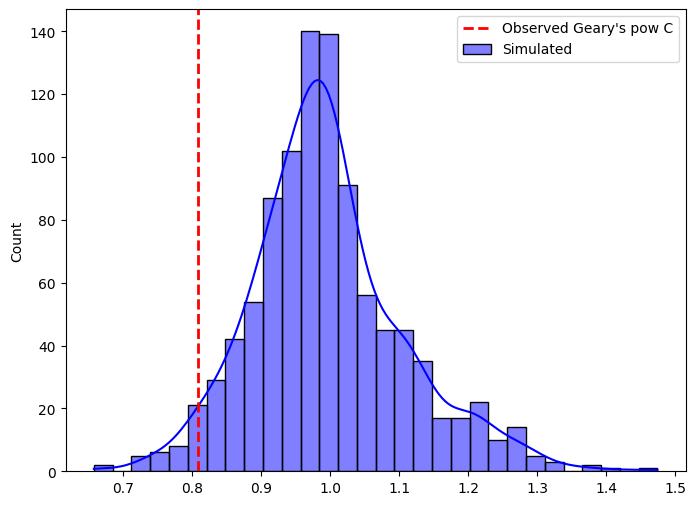

In [1100]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

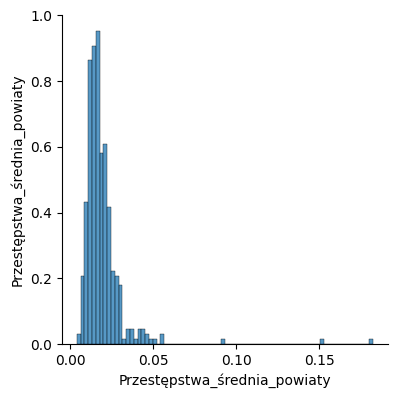

In [1101]:
sns.pairplot(pow, height=4)  
plt.show()


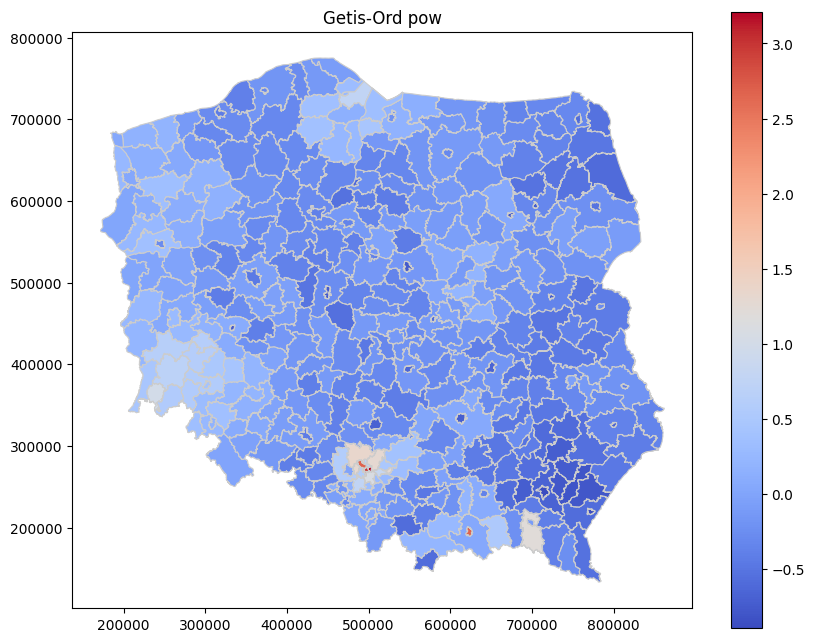

In [1102]:
merged_pow['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

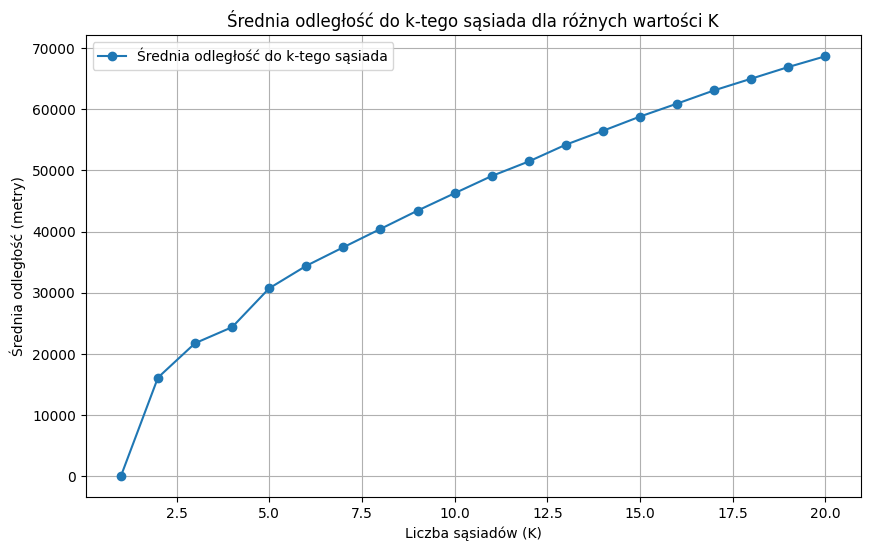

In [1103]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Wyciągnięcie współrzędnych centroidów
centroids = merged_pow.geometry.centroid
coords = np.array([[point.x, point.y] for point in centroids])

# Zakres wartości K
k_values = range(1, 21)  

avg_distances = []

for k in k_values:
 
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(coords)
    
  
    distances, indices = knn.kneighbors(coords)
    
   
    avg_distance = np.mean(distances[:, -1])  
    avg_distances.append(avg_distance)


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_distances, marker='o', label='Średnia odległość do k-tego sąsiada')
plt.xlabel('Liczba sąsiadów (K)')
plt.ylabel('Średnia odległość (metry)')
plt.title('Średnia odległość do k-tego sąsiada dla różnych wartości K')
plt.grid(True)
plt.legend()
plt.show()


In [1104]:
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np


data_column = 'Przestępstwa_średnia_powiaty'
k = 7
w_knn = KNN.from_dataframe(merged_pow, k=k)

y_knn = merged_pow[data_column]

In [1105]:
y_knn = merged_pow[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm)       

Moran's I: 0.10907703147447807
E(I): -0.00228310502283105
Var(I): 0.000584824108221159
Z(I): 4.604867315518955
p-value: 4.127289257888758e-06


In [1106]:
geary_pow_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)        
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm)        

Geary's C: 1.0275393882711046
E(C): 1.0
Var(C): 0.0006778907580732869
Z(C): 1.057729050909316
p-value: 0.14508949342083916


In [1107]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)             

G: 0.01723073435109275
E(G): 0.01598173515981735
Var(G): 5.42729327084805e-08
Z(G): 5.361304971161418
p-value: 4.1311446485892134e-08


In [1108]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [ 1.35001820e+00  1.49352599e+00  1.41454486e+00  1.52572355e+00
  1.32114055e-01  2.75804888e-01  1.97084228e-01  3.07649862e-01
  3.08295080e-01  6.69864754e-02 -2.53246378e-01 -1.75424779e-01
 -5.82619008e-02 -2.17965556e-02  2.11552007e-01  1.46192315e-01
  4.36883057e-02  3.95974631e-01 -3.34905932e-01  2.48956741e-01
  9.16971509e-01  3.98387699e-02  4.07857757e-02  6.53576964e-01
 -3.11118601e-01 -6.40669860e-01  1.46865736e+00  6.97257235e-02
 -7.30359952e-01  3.68133196e-02 -8.33383256e-02  3.44513345e-01
  5.44242124e-02 -1.24452466e-01 -4.71887850e-02 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -2.82687802e-01
  7.32104605e-02  1.23751297e-01  2.06036164e-01 -1.75093098e-01
 -8.71897800e-02  2.63557574e+00  1.64090889e-01  2.38603913e+00
  8.62686443e-01  3.62653693e-01 -1.85083648e-01  7.51050246e-01
 -2.22366461e-01 -8.41831435e-02 -1.80535145e-01  3.66394232e-02
  1.59242689e+00 -6.98697746e-04 -1.75066976e-01 -1.77133459e-01
  1.7996

In [1109]:
results_knn = pd.DataFrame({"Statystyka": ["Moran's I", "Geary's C", "Getis-Ord G"],
                            "Wartość": [moran_pow_knn.I, geary_pow_knn.C, g_pow_knn.G],
                            "Wartość oczekiwana": [moran_pow_knn.EI, geary_pow_knn.EC, g_pow_knn.EG],
                            "Wariancja": [moran_pow_knn.VI_norm, geary_pow_knn.VC_norm, g_pow_knn.VG],
                            "Z-score": [moran_pow_knn.z_norm, geary_pow_knn.z_norm, g_pow_knn.z_norm],
                            "p-value": [moran_pow_knn.p_norm, geary_pow_knn.p_norm, g_pow_knn.p_norm]})
print(results_knn)
df_results_knn = pd.DataFrame(results_knn)
output_csv_path_knn2 = "spatial_statistics_summary_knn.csv"
df_results_knn.to_csv(output_csv_path_knn2, index=False)
print(f"Wyniki zapisano do pliku CSV: {output_csv_path_knn2}")


    Statystyka   Wartość  Wartość oczekiwana     Wariancja   Z-score  \
0    Moran's I  0.109077           -0.002283  5.848241e-04  4.604867   
1    Geary's C  1.027539            1.000000  6.778908e-04  1.057729   
2  Getis-Ord G  0.017231            0.015982  5.427293e-08  5.361305   

        p-value  
0  4.127289e-06  
1  1.450895e-01  
2  4.131145e-08  
Wyniki zapisano do pliku CSV: spatial_statistics_summary_knn.csv


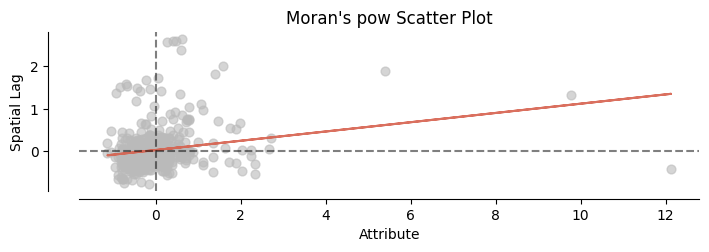

In [1110]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

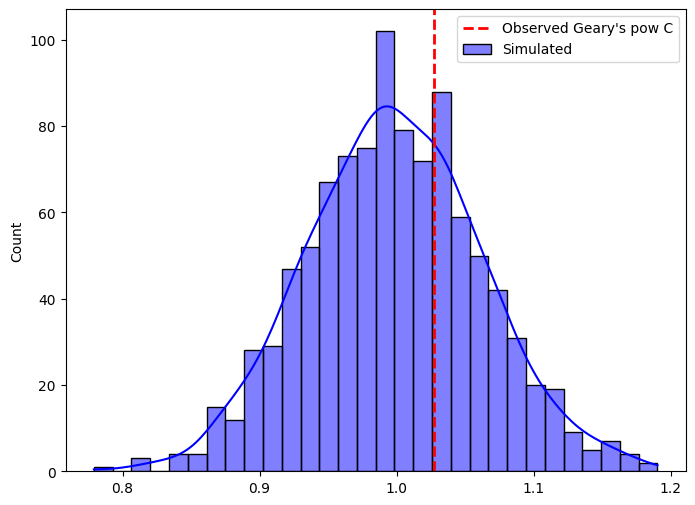

In [1111]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

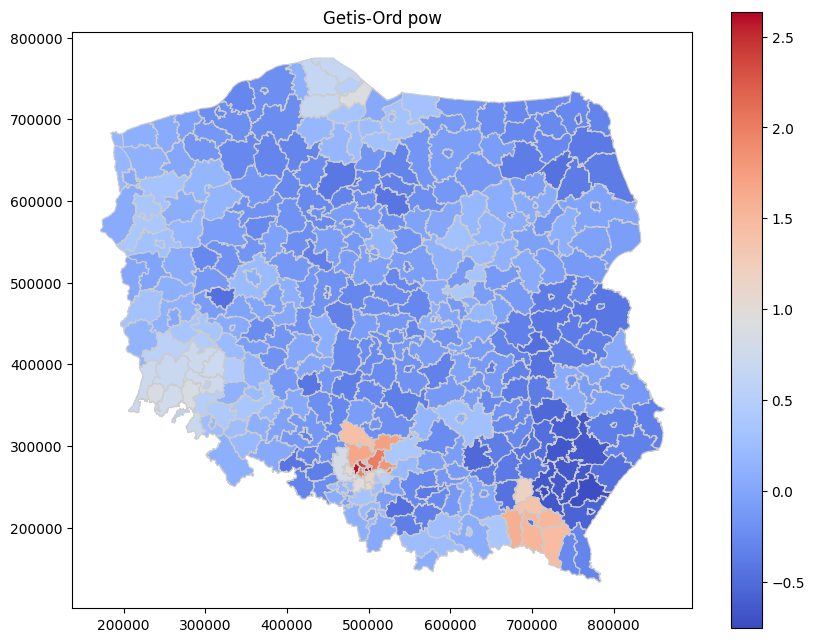

In [1112]:
merged_pow['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

#Analiza przy użyciu macierzy wag opartych na odległości 

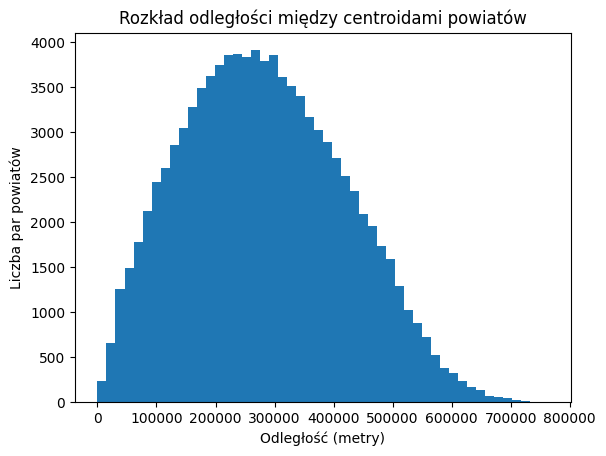

In [1113]:
from scipy.spatial.distance import pdist
import numpy as np

# Wyciągnięcie centroidów powiatów
centroids = merged_pow.geometry.centroid

# Obliczenie macierzy odległości między centroidami
coords = np.array([[point.x, point.y] for point in centroids])
distances = pdist(coords)

# Wykres histogramu odległości
plt.hist(distances, bins=50)
plt.xlabel('Odległość (metry)')
plt.ylabel('Liczba par powiatów')
plt.title('Rozkład odległości między centroidami powiatów')
plt.show()


In [1114]:
import numpy as np
from libpysal.weights import DistanceBand

max_dist = merged_pow.geometry.centroid.distance(merged_pow.geometry.centroid.unary_union).max()

threshold_distance = 300000 

w_distance = DistanceBand.from_dataframe(merged_pow, threshold=threshold_distance, binary=True, silence_warnings=True)
w_distance.transform = 'r'

moran_distance = Moran(y, w_distance)
print("Moran's I (distance-based weights):", moran_distance.I)
print("E(I):", moran_distance.EI)
print("Var(I):", moran_distance.VI_norm)
print("Z(I):", moran_distance.z_norm)
print("p-value (normal approximation):", moran_distance.p_norm)


geary_distance = Geary(y, w_distance)
print("Geary's C (distance-based weights):", geary_distance.C)
print("E(C):", geary_distance.EC)
print("Var(C):", geary_distance.VC_norm)
print("Z(C):", geary_distance.z_norm)
print("p-value (normal approximation):", geary_distance.p_norm)

g_distance = G(y, w_distance)
print("Getis-Ord G (distance-based weights):", g_distance.G)
print("E(G):", g_distance.EG)
print("Var(G):", g_distance.VG)
print("Z(G):", g_distance.z_norm)
print("p-value (normal approximation):", g_distance.p_norm)


C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\3154601806.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_dist = merged_pow.geometry.centroid.distance(merged_pow.geometry.centroid.unary_union).max()


Moran's I (distance-based weights): 0.005437854297909228
E(I): -0.00228310502283105
Var(I): 8.618248205397388e-06
Z(I): 2.6300364380503045
p-value (normal approximation): 0.008537571675874267
Geary's C (distance-based weights): 0.9584744283237212
E(C): 1.0
Var(C): 7.736199720469879e-05
Z(C): -4.721193314569975
p-value (normal approximation): 1.1723248015143828e-06
Getis-Ord G (distance-based weights): 0.5611145792804787
E(G): 0.5635992968660614
Var(G): 0.000101453990067224
Z(G): -0.24668484394389276
p-value (normal approximation): 0.4025760684613948


#Analiza z wykorzystaniem testów permutacyjnych i różnych macierzy wag

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

In [1115]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7) 
moran_pow_knn_perm = Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_knn_perm.I)
print("E(I):", moran_pow_knn_perm.EI)
print("Var(I):", moran_pow_knn_perm.VI_norm)
print("Z(I):", moran_pow_knn_perm.z_norm)
print("p-value:", moran_pow_knn_perm.p_norm)      

Moran's I (z permutacjami): 0.10907703147447807
E(I): -0.00228310502283105
Var(I): 0.000584824108221159
Z(I): 4.604867315518955
p-value: 4.127289257888758e-06


In [1116]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7)
geary_pow_knn_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_knn_perm.C)
print("E(C):", geary_pow_knn_perm.EC)
print("Var(C):", geary_pow_knn_perm.VC_norm)
print("Z(C):", geary_pow_knn_perm.z_norm)
print("p-value:", geary_pow_knn_perm.p_norm)        

Geary's C (z permutacjami): 1.0275393882711046
E(C): 1.0
Var(C): 0.0006778907580732869
Z(C): 1.057729050909316
p-value: 0.14508949342083916


In [1117]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7)  

g_pow_knn_perm = G(y, w, permutations=1000)
print("G (z permutacjami):", g_pow_knn_perm.G)
print("E(G):", g_pow_knn_perm.EG)
print("Var(G):", g_pow_knn_perm.VG)
print("Z(G):", g_pow_knn_perm.z_norm)
print("p-value:", g_pow_knn_perm.p_norm)             

G (z permutacjami): 0.01723073435109275
E(G): 0.01598173515981735
Var(G): 5.42729327084805e-08
Z(G): 5.361304971161418
p-value: 4.1311446485892134e-08


#Analiza przy użyciu binarnej macierzy sąsiedztwa 

In [1118]:
y = merged_pow[data_column]

moran_pow_queen_perm= Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_queen_perm.I)
print("E(I):", moran_pow_queen_perm.EI)
print("Var(I):", moran_pow_queen_perm.VI_norm)
print("Z(I):", moran_pow_queen_perm.z_norm)
print("p-value:", moran_pow_queen_perm.p_norm)       

Moran's I (z permutacjami): 0.10907703147447807
E(I): -0.00228310502283105
Var(I): 0.000584824108221159
Z(I): 4.604867315518955
p-value: 4.127289257888758e-06


In [1119]:
geary_pow_queen_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_queen_perm.C)
print("E(C):", geary_pow_queen_perm.EC)
print("Var(C):", geary_pow_queen_perm.VC_norm)
print("Z(C):", geary_pow_queen_perm.z_norm)
print("p-value:", geary_pow_queen_perm.p_norm)       

Geary's C (z permutacjami): 1.0275393882711046
E(C): 1.0
Var(C): 0.0006778907580732869
Z(C): 1.057729050909316
p-value: 0.14508949342083916


In [1120]:
g_pow_queen_perm = G(y, w, permutations=1000)

print("G (z permutacjami):", g_pow_queen_perm.G)
print("E(G):", g_pow_queen_perm.EG)
print("Var(G):", g_pow_queen_perm.VG)
print("Z(G):", g_pow_queen_perm.z_norm)
print("p-value:", g_pow_queen_perm.p_norm)         

G (z permutacjami): 0.01723073435109275
E(G): 0.01598173515981735
Var(G): 5.42729327084805e-08
Z(G): 5.361304971161418
p-value: 4.1311446485892134e-08


Analiza przy użyciu macierzy wag opartych na odległości

In [1121]:
y=merged_pow[data_column]
threshold_distance = 30000  # w metrach (30 km)
w_distance = DistanceBand.from_dataframe(
    merged_pow, 
    threshold=threshold_distance, 
    binary=True, 
    silence_warnings=True
)
w_distance.transform = 'r'
moran_pow_distance_perm = Moran(y, w_distance, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_distance_perm.I)
print("E(I):", moran_pow_distance_perm.EI)
print("Var(I):", moran_pow_distance_perm.VI_norm)
print("Z(I):", moran_pow_distance_perm.z_norm)
print("p-value:", moran_pow_distance_perm.p_norm)


Moran's I (z permutacjami): 0.10291446192481742
E(I): -0.00228310502283105
Var(I): 0.002131657552223204
Z(I): 2.2784892127870533
p-value: 0.022697446479401157


In [1122]:
geary_pow_distance_perm = Geary(y, w_distance, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_distance_perm.C)
print("E(C):", geary_pow_distance_perm.EC)
print("Var(C):", geary_pow_distance_perm.VC_norm)
print("Z(C):", geary_pow_distance_perm.z_norm)
print("p-value:", geary_pow_distance_perm.p_norm)

Geary's C (z permutacjami): 1.1517934219219519
E(C): 1.0
Var(C): 0.0031555975175071357
Z(C): 2.7021667681927983
p-value: 0.003444459990787074


In [1123]:
getis_pow_distance_perm = G(y, w_distance, permutations=1000)
print("Getis-Ord G (z permutacjami):", getis_pow_distance_perm.G)
print("E(G):", getis_pow_distance_perm.EG)
print("Var(G):", getis_pow_distance_perm.VG)
print("Z(G):", getis_pow_distance_perm.z_norm)
print("p-value:", getis_pow_distance_perm.p_norm)

Getis-Ord G (z permutacjami): 0.011776224398629109
E(G): 0.007697028322983951
Var(G): 2.971930179328415e-07
Z(G): 7.482647388686264
p-value: 3.6415315207705135e-14


Analiza danych dla województwa warmińsko-mazurskiego

In [1124]:
pow_mal = pd.read_csv("przestepstwa_pow.csv")
pow_mal_map = "powiaty.shp"
pow_mal_m = gpd.read_file(pow_mal_map)

In [1125]:
pow_mal.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow_mal.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow_mal.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow_mal = pow_mal[pow_mal['Województwo'].isin(['warmińsko-mazurskie'])]
pow_mal

,JPT_NAZWA_,Województwo,Przestępstwa_powiaty
129,gołdapski,warmińsko-mazurskie,322.0
133,węgorzewski,warmińsko-mazurskie,387.0
137,Olsztyn,warmińsko-mazurskie,3898.0
232,braniewski,warmińsko-mazurskie,962.0
233,działdowski,warmińsko-mazurskie,1116.0
234,elbląski,warmińsko-mazurskie,927.0
235,iławski,warmińsko-mazurskie,1767.0
236,nowomiejski,warmińsko-mazurskie,729.0
237,ostródzki,warmińsko-mazurskie,1732.0
238,Elbląg,warmińsko-mazurskie,3124.0


In [1126]:
pow_mal.describe()

,Przestępstwa_powiaty
count,21.000000
mean,1252.142857
std,885.267603
min,322.000000
25%,723.000000
50%,962.000000
75%,1603.000000
max,3898.000000


In [1127]:
pow_mal_m['JPT_NAZWA_'] = pow_mal_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [1128]:
pow_mal['JPT_NAZWA_'] = pow_mal['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [1129]:
merged_df_mal = pow_mal.merge(ludnosc_pow, on='JPT_NAZWA_')

In [1130]:
merged_df_mal['Przestępstwa_średnia_powiaty'] = (merged_df_mal['Przestępstwa_powiaty'] / merged_df_mal['Ludnosc_powiaty'])

In [1131]:
print(merged_df_mal[['JPT_NAZWA_', 'Województwo', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

      JPT_NAZWA_          Województwo  Przestępstwa_powiaty  Ludnosc_powiaty  \
0      gołdapski  warmińsko-mazurskie                 322.0            26689   
1    węgorzewski  warmińsko-mazurskie                 387.0            22638   
2        Olsztyn  warmińsko-mazurskie                3898.0           171979   
3     braniewski  warmińsko-mazurskie                 962.0            41034   
4    działdowski  warmińsko-mazurskie                1116.0            65139   
5       elbląski  warmińsko-mazurskie                 927.0            57211   
6        iławski  warmińsko-mazurskie                1767.0            92879   
7    nowomiejski  warmińsko-mazurskie                 729.0            43822   
8      ostródzki  warmińsko-mazurskie                1732.0           104151   
9         Elbląg  warmińsko-mazurskie                3124.0           119317   
10         ełcki  warmińsko-mazurskie                1603.0            91560   
11       giżycki  warmińsko-mazurskie   

In [1132]:
pow_mal = merged_df_mal[merged_df_mal['Województwo'] == 'warmińsko-mazurskie'][['JPT_NAZWA_', 'Województwo', 'Przestępstwa_średnia_powiaty']]
print(pow_mal)

      JPT_NAZWA_          Województwo  Przestępstwa_średnia_powiaty
0      gołdapski  warmińsko-mazurskie                      0.012065
1    węgorzewski  warmińsko-mazurskie                      0.017095
2        Olsztyn  warmińsko-mazurskie                      0.022666
3     braniewski  warmińsko-mazurskie                      0.023444
4    działdowski  warmińsko-mazurskie                      0.017133
5       elbląski  warmińsko-mazurskie                      0.016203
6        iławski  warmińsko-mazurskie                      0.019025
7    nowomiejski  warmińsko-mazurskie                      0.016635
8      ostródzki  warmińsko-mazurskie                      0.016630
9         Elbląg  warmińsko-mazurskie                      0.026182
10         ełcki  warmińsko-mazurskie                      0.017508
11       giżycki  warmińsko-mazurskie                      0.017308
12        olecki  warmińsko-mazurskie                      0.014232
13         piski  warmińsko-mazurskie           

In [1133]:
print(pow_mal.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

      JPT_NAZWA_          Województwo  Przestępstwa_średnia_powiaty
9         Elbląg  warmińsko-mazurskie                      0.026182
3     braniewski  warmińsko-mazurskie                      0.023444
2        Olsztyn  warmińsko-mazurskie                      0.022666
20  szczycieński  warmińsko-mazurskie                      0.021405
18      nidzicki  warmińsko-mazurskie                      0.020635
13         piski  warmińsko-mazurskie                      0.019115
6        iławski  warmińsko-mazurskie                      0.019025
10         ełcki  warmińsko-mazurskie                      0.017508
11       giżycki  warmińsko-mazurskie                      0.017308
4    działdowski  warmińsko-mazurskie                      0.017133
1    węgorzewski  warmińsko-mazurskie                      0.017095
7    nowomiejski  warmińsko-mazurskie                      0.016635
8      ostródzki  warmińsko-mazurskie                      0.016630
5       elbląski  warmińsko-mazurskie           

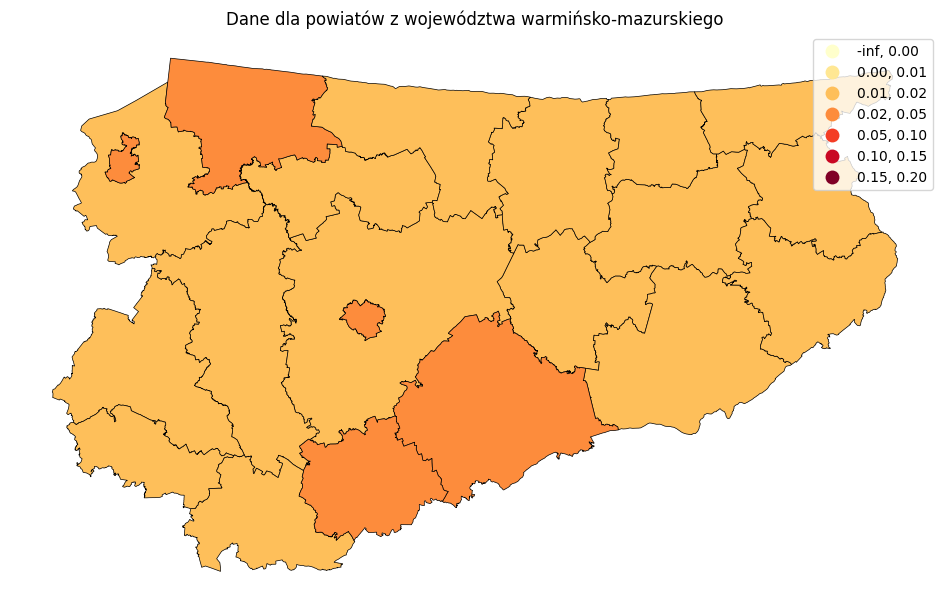

In [1134]:
merged_pow_mal = pow_mal_m.merge(pow_mal, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow_mal['Kategoria'] = np.digitize(
    merged_pow_mal['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow_mal.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów z województwa warmińsko-mazurskiego')
plt.show()

In [1135]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow_mal)
w.transform = 'r'

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\3911756976.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow_mal)


In [1136]:
y = merged_pow_mal[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: -0.0613129357221696
E(I): -0.05
Var(I): 0.0225291649488078
Z(I): -0.07537073877297923
p-value: 0.939919740046464


In [1137]:
geary_pow = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)         

Geary's C: 0.8458552185288954
E(C): 1.0
Var(C): 0.027158612362693957
Z(C): -0.9353519116622369
p-value: 0.174803485327801


In [1138]:
g_pow = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)              

G: 0.17998000975135053
E(G): 0.19523809523809524
Var(G): 5.365273332443715e-05
Z(G): -2.0830712160011227
p-value: 0.018622366309268168


In [1139]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

Local G* values: [ 0.74393764 -0.36776535 -0.63860369 -0.1503097  -0.15314558 -0.07001798
  0.14259552  0.0158774  -0.71691386 -0.65781535 -0.11425685 -0.23571577
 -0.23934161 -0.5701165  -0.9504572  -0.05265079 -0.54306857 -0.51178723
 -0.25836955  0.00125215  0.09219207]


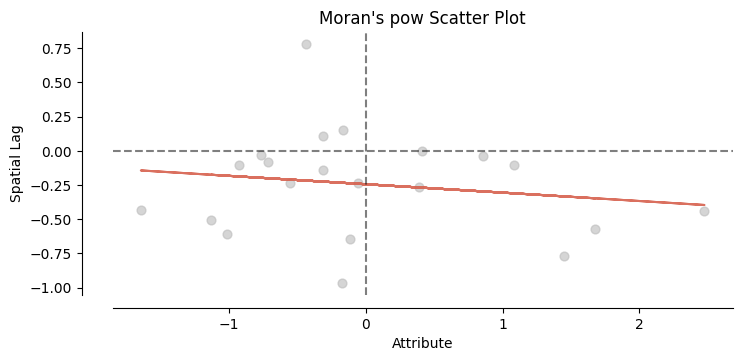

In [1140]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

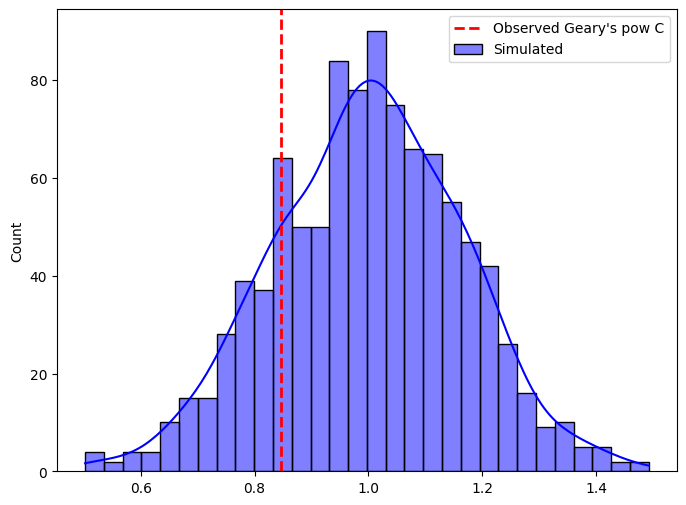

In [1141]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

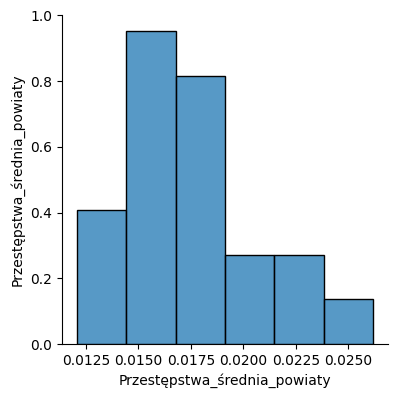

In [1142]:
sns.pairplot(pow_mal, height=4)  
plt.show()

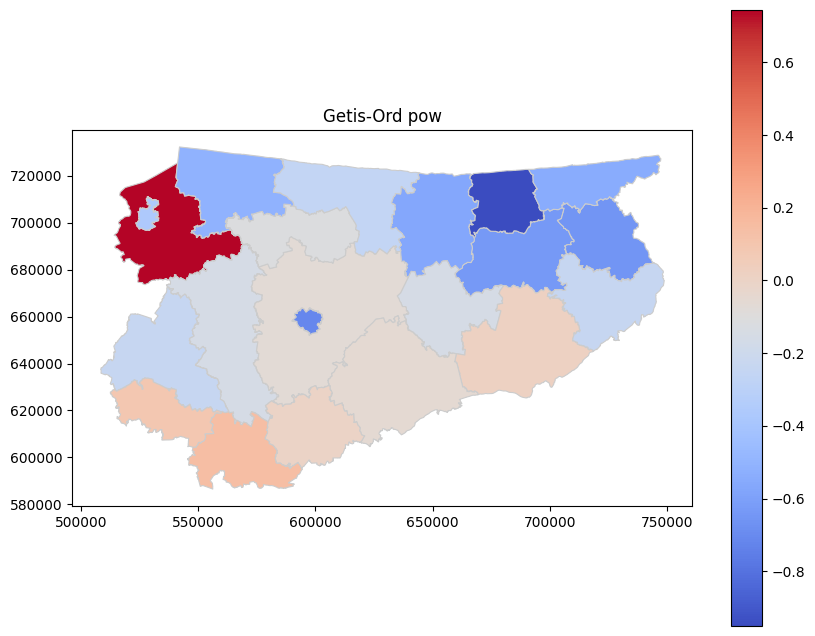

In [1143]:
merged_pow_mal['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_mal.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

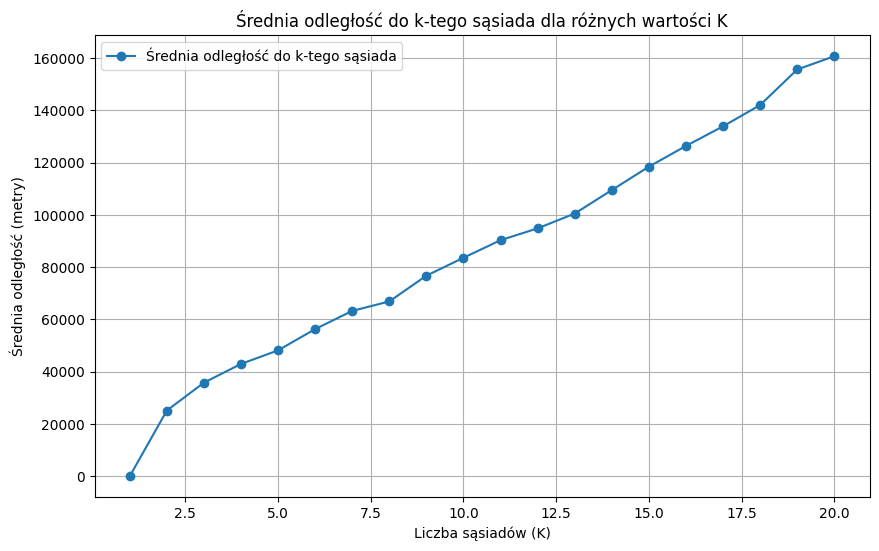

In [1144]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Wyciągnięcie współrzędnych centroidów
centroids = merged_pow_mal.geometry.centroid
coords = np.array([[point.x, point.y] for point in centroids])

# Zakres wartości K
k_values = range(1, 21)  

avg_distances = []

for k in k_values:
 
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(coords)
    
  
    distances, indices = knn.kneighbors(coords)
    
   
    avg_distance = np.mean(distances[:, -1])  
    avg_distances.append(avg_distance)


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_distances, marker='o', label='Średnia odległość do k-tego sąsiada')
plt.xlabel('Liczba sąsiadów (K)')
plt.ylabel('Średnia odległość (metry)')
plt.title('Średnia odległość do k-tego sąsiada dla różnych wartości K')
plt.grid(True)
plt.legend()
plt.show()


In [1145]:
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np


data_column = 'Przestępstwa_średnia_powiaty'
k = 7
w_knn = KNN.from_dataframe(merged_pow_mal, k=k)

y_knn = merged_pow_mal[data_column]

In [1146]:
y_knn = merged_pow_mal[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm)

Moran's I: 0.10193728150424422
E(I): -0.05
Var(I): 0.007143078010424957
Z(I): 1.7977183649898016
p-value: 0.0722216496226112


In [1147]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)

G: 0.3460131520003443
E(G): 0.35
Var(G): 3.866198632615503e-05
Z(G): -0.6411912643627313
p-value: 0.26069921227181436


In [1148]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [ 0.56541059  0.43501773 -0.63860369  0.06061685 -0.09414287  0.08561425
  0.3238184  -0.30741459 -0.12311669 -0.57190935 -0.04700803 -0.64373693
  0.28868459 -0.46729341 -0.63327177  0.01479231 -0.53742371  0.25861374
 -0.11087412  0.23530649  0.12536372]


In [1149]:
results_knn = pd.DataFrame({"Statystyka": ["Moran's I", "Geary's C", "Getis-Ord G"],
                            "Wartość": [moran_pow_knn.I, geary_pow_knn.C, g_pow_knn.G],
                            "Wartość oczekiwana": [moran_pow_knn.EI, geary_pow_knn.EC, g_pow_knn.EG],
                            "Wariancja": [moran_pow_knn.VI_norm, geary_pow_knn.VC_norm, g_pow_knn.VG],
                            "Z-score": [moran_pow_knn.z_norm, geary_pow_knn.z_norm, g_pow_knn.z_norm],
                            "p-value": [moran_pow_knn.p_norm, geary_pow_knn.p_norm, g_pow_knn.p_norm]})
print(results_knn)
df_results_knn = pd.DataFrame(results_knn)
output_csv_path_knn_mal = "spatial_statistics_summary_knn_mal.csv"
df_results_knn.to_csv(output_csv_path_knn_mal, index=False)
print(f"Wyniki zapisano do pliku CSV: {output_csv_path_knn_mal}")

    Statystyka   Wartość  Wartość oczekiwana  Wariancja   Z-score   p-value
0    Moran's I  0.101937               -0.05   0.007143  1.797718  0.072222
1    Geary's C  1.027539                1.00   0.000678  1.057729  0.145089
2  Getis-Ord G  0.346013                0.35   0.000039 -0.641191  0.260699
Wyniki zapisano do pliku CSV: spatial_statistics_summary_knn_mal.csv


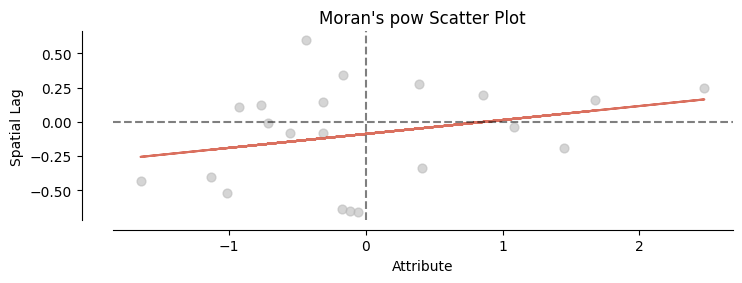

In [1150]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

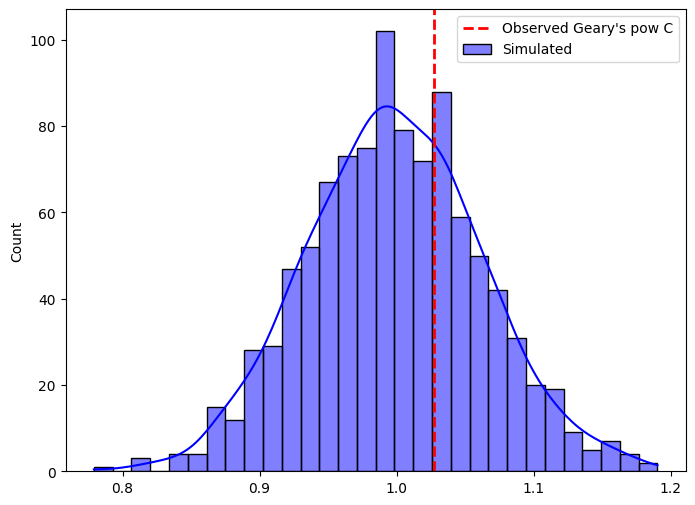

In [1151]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

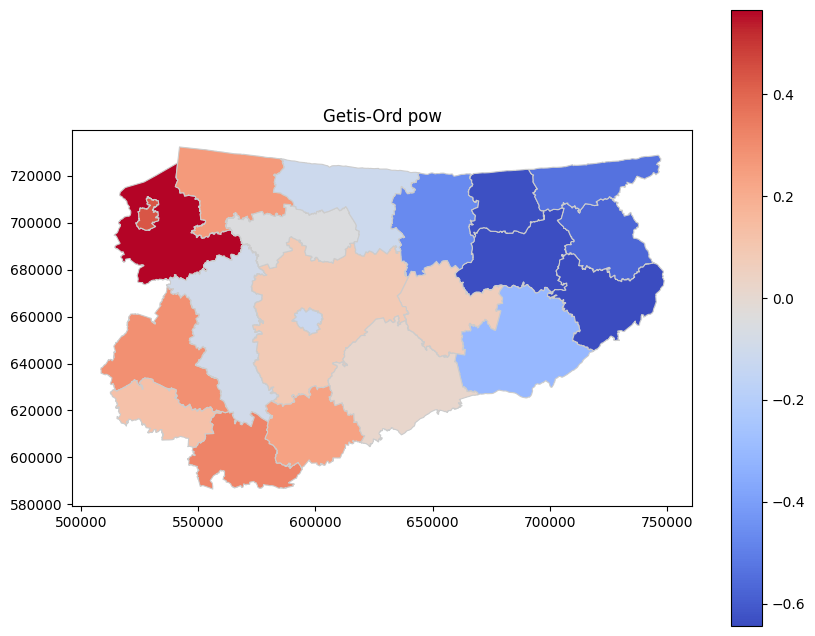

In [1152]:
merged_pow_mal['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_mal.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

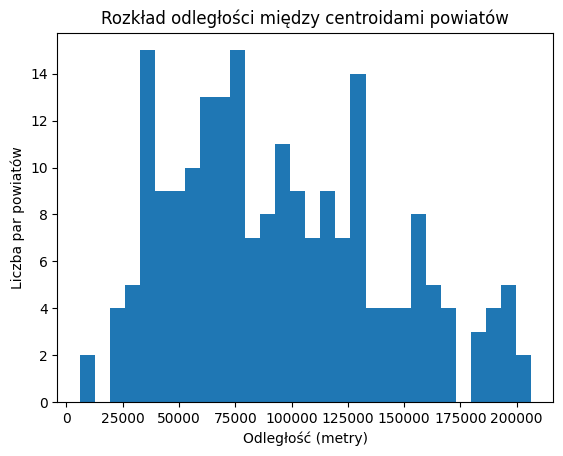

In [1153]:
from scipy.spatial.distance import pdist
import numpy as np

# Wyciągnięcie centroidów powiatów
centroids = merged_pow_mal.geometry.centroid

# Obliczenie macierzy odległości między centroidami
coords = np.array([[point.x, point.y] for point in centroids])
distances = pdist(coords)

# Wykres histogramu odległości
plt.hist(distances, bins=30)
plt.xlabel('Odległość (metry)')
plt.ylabel('Liczba par powiatów')
plt.title('Rozkład odległości między centroidami powiatów')
plt.show()

In [1154]:
import numpy as np
from libpysal.weights import DistanceBand

max_dist = merged_pow_mal.geometry.centroid.distance(merged_pow_mal.geometry.centroid.unary_union).max()

threshold_distance = 100000 

w_distance = DistanceBand.from_dataframe(merged_pow_mal, threshold=threshold_distance, binary=True, silence_warnings=True)
w_distance.transform = 'r'

moran_distance = Moran(y, w_distance)
print("Moran's I (distance-based weights):", moran_distance.I)
print("E(I):", moran_distance.EI)
print("Var(I):", moran_distance.VI_norm)
print("Z(I):", moran_distance.z_norm)
print("p-value (normal approximation):", moran_distance.p_norm)


geary_distance = Geary(y, w_distance)
print("Geary's C (distance-based weights):", geary_distance.C)
print("E(C):", geary_distance.EC)
print("Var(C):", geary_distance.VC_norm)
print("Z(C):", geary_distance.z_norm)
print("p-value (normal approximation):", geary_distance.p_norm)

g_distance = G(y, w_distance)
print("Getis-Ord G (distance-based weights):", g_distance.G)
print("E(G):", g_distance.EG)
print("Var(G):", g_distance.VG)
print("Z(G):", g_distance.z_norm)
print("p-value (normal approximation):", g_distance.p_norm)

Moran's I (distance-based weights): 0.05430781026939302
E(I): -0.05
Var(I): 0.003528747788982308
Z(I): 1.7559272508291188
p-value (normal approximation): 0.07910083121929411
Geary's C (distance-based weights): 0.8612388644321656
E(C): 1.0
Var(C): 0.0047901269101158165
Z(C): -2.0049074765235315
p-value (normal approximation): 0.022486469641635504
Getis-Ord G (distance-based weights): 0.5868783001996676
E(G): 0.5857142857142857
Var(G): 0.0001707588960034312
Z(G): 0.08907723250319782
p-value (normal approximation): 0.4645102656419873


C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\2452040195.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_dist = merged_pow_mal.geometry.centroid.distance(merged_pow_mal.geometry.centroid.unary_union).max()


Analiza z wykorzystaniem testów permutacyjnych i różnych macierzy wag

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

In [1155]:
y = merged_pow_mal[data_column]
w = weights.KNN.from_dataframe(merged_pow_mal, k=7) 
moran_pow_knn_perm = Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_knn_perm.I)
print("E(I):", moran_pow_knn_perm.EI)
print("Var(I):", moran_pow_knn_perm.VI_norm)
print("Z(I):", moran_pow_knn_perm.z_norm)
print("p-value:", moran_pow_knn_perm.p_norm)  

Moran's I (z permutacjami): 0.10193728150424422
E(I): -0.05
Var(I): 0.007143078010424957
Z(I): 1.7977183649898016
p-value: 0.0722216496226112


In [1156]:
y = merged_pow_mal[data_column]
w = weights.KNN.from_dataframe(merged_pow_mal, k=7)
geary_pow_knn_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_knn_perm.C)
print("E(C):", geary_pow_knn_perm.EC)
print("Var(C):", geary_pow_knn_perm.VC_norm)
print("Z(C):", geary_pow_knn_perm.z_norm)
print("p-value:", geary_pow_knn_perm.p_norm)

Geary's C (z permutacjami): 0.7822612355686127
E(C): 1.0
Var(C): 0.010395500191418543
Z(C): -2.1355662993891498
p-value: 0.016357390393955947


In [1157]:
y = merged_pow_mal[data_column]
w = weights.KNN.from_dataframe(merged_pow_mal, k=7)  

g_pow_knn_perm = G(y, w, permutations=1000)
print("G (z permutacjami):", g_pow_knn_perm.G)
print("E(G):", g_pow_knn_perm.EG)
print("Var(G):", g_pow_knn_perm.VG)
print("Z(G):", g_pow_knn_perm.z_norm)
print("p-value:", g_pow_knn_perm.p_norm) 

G (z permutacjami): 0.3460131520003443
E(G): 0.35
Var(G): 3.866198632615503e-05
Z(G): -0.6411912643627313
p-value: 0.26069921227181436


Analiza przy użyciu binarnej macierzy sąsiedztwa

In [1158]:
y = merged_pow_mal[data_column]

moran_pow_queen_perm= Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_queen_perm.I)
print("E(I):", moran_pow_queen_perm.EI)
print("Var(I):", moran_pow_queen_perm.VI_norm)
print("Z(I):", moran_pow_queen_perm.z_norm)
print("p-value:", moran_pow_queen_perm.p_norm) 

Moran's I (z permutacjami): 0.10193728150424422
E(I): -0.05
Var(I): 0.007143078010424957
Z(I): 1.7977183649898016
p-value: 0.0722216496226112


In [1159]:
geary_pow_queen_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_queen_perm.C)
print("E(C):", geary_pow_queen_perm.EC)
print("Var(C):", geary_pow_queen_perm.VC_norm)
print("Z(C):", geary_pow_queen_perm.z_norm)
print("p-value:", geary_pow_queen_perm.p_norm)

Geary's C (z permutacjami): 0.7822612355686127
E(C): 1.0
Var(C): 0.010395500191418543
Z(C): -2.1355662993891498
p-value: 0.016357390393955947


In [1160]:
g_pow_queen_perm = G(y, w, permutations=1000)

print("G (z permutacjami):", g_pow_queen_perm.G)
print("E(G):", g_pow_queen_perm.EG)
print("Var(G):", g_pow_queen_perm.VG)
print("Z(G):", g_pow_queen_perm.z_norm)
print("p-value:", g_pow_queen_perm.p_norm) 

G (z permutacjami): 0.3460131520003443
E(G): 0.35
Var(G): 3.866198632615503e-05
Z(G): -0.6411912643627313
p-value: 0.26069921227181436


In [1161]:
y=merged_pow_mal[data_column]
threshold_distance = 30000  # w metrach (30 km)
w_distance = DistanceBand.from_dataframe(
    merged_pow_mal, 
    threshold=threshold_distance, 
    binary=True, 
    silence_warnings=True
)
w_distance.transform = 'r'
moran_pow_distance_perm = Moran(y, w_distance, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_distance_perm.I)
print("E(I):", moran_pow_distance_perm.EI)
print("Var(I):", moran_pow_distance_perm.VI_norm)
print("Z(I):", moran_pow_distance_perm.z_norm)
print("p-value:", moran_pow_distance_perm.p_norm)

Moran's I (z permutacjami): -0.09479930173513686
E(I): -0.05
Var(I): 0.1177922077922078
Z(I): -0.13053078925109474
p-value: 0.8961464962203699


In [1162]:
geary_pow_distance_perm = Geary(y, w_distance, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_distance_perm.C)
print("E(C):", geary_pow_distance_perm.EC)
print("Var(C):", geary_pow_distance_perm.VC_norm)
print("Z(C):", geary_pow_distance_perm.z_norm)
print("p-value:", geary_pow_distance_perm.p_norm)

Geary's C (z permutacjami): 1.0300554292355053
E(C): 1.0
Var(C): 0.161873840445269
Z(C): 0.07470240768185556
p-value: 0.4702257459876282


In [1163]:
getis_pow_distance_perm = G(y, w_distance, permutations=1000)
print("Getis-Ord G (z permutacjami):", getis_pow_distance_perm.G)
print("E(G):", getis_pow_distance_perm.EG)
print("Var(G):", getis_pow_distance_perm.VG)
print("Z(G):", getis_pow_distance_perm.z_norm)
print("p-value:", getis_pow_distance_perm.p_norm)

Getis-Ord G (z permutacjami): 0.035873472744952194
E(G): 0.0380952380952381
Var(G): 7.112091813572677e-06
Z(G): -0.8331045610780144
p-value: 0.2023928807266555


Analiza danych dla województwa kujawsko-pomorskiego

In [1164]:
pow_pod = pd.read_csv("przestepstwa_pow.csv")
pow_pod_map = "powiaty.shp"
pow_pod_m = gpd.read_file(pow_map)

In [1165]:
pow_pod.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow_pod.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow_pod.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow_pod = pow_pod[pow_pod['Województwo'].isin(['kujawsko-pomorskie'])]
pow_pod

,JPT_NAZWA_,Województwo,Przestępstwa_powiaty
11,włocławski,kujawsko-pomorskie,1022.0
12,bydgoski,kujawsko-pomorskie,1596.0
50,Bydgoszcz,kujawsko-pomorskie,7306.0
51,Toruń,kujawsko-pomorskie,4718.0
52,chełmiński,kujawsko-pomorskie,673.0
68,aleksandrowski,kujawsko-pomorskie,1510.0
199,toruński,kujawsko-pomorskie,1549.0
200,brodnicki,kujawsko-pomorskie,1407.0
201,golubsko-dobrzyński,kujawsko-pomorskie,715.0
203,grudziądzki,kujawsko-pomorskie,326.0


In [1166]:
pow_pod.describe()

,Przestępstwa_powiaty
count,23.000000
mean,1616.173913
std,1606.599788
min,326.000000
25%,663.000000
50%,1067.000000
75%,1641.500000
max,7306.000000


In [1167]:
pow_pod_m['JPT_NAZWA_'] = pow_pod_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [1168]:
file_path = 'ludnosc.csv'


df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() 


ludnosc_pow = pd.DataFrame({
    'JPT_NAZWA_': df['Powiaty'],
    'Ludnosc_powiaty': df['Ludnosc']
})


print(ludnosc_pow)

            JPT_NAZWA_  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [1169]:
print(pow_pod)

              JPT_NAZWA_         Województwo  Przestępstwa_powiaty
11            włocławski  kujawsko-pomorskie                1022.0
12              bydgoski  kujawsko-pomorskie                1596.0
50             Bydgoszcz  kujawsko-pomorskie                7306.0
51                 Toruń  kujawsko-pomorskie                4718.0
52            chełmiński  kujawsko-pomorskie                 673.0
68        aleksandrowski  kujawsko-pomorskie                1510.0
199             toruński  kujawsko-pomorskie                1549.0
200            brodnicki  kujawsko-pomorskie                1407.0
201  golubsko-dobrzyński  kujawsko-pomorskie                 715.0
203          grudziądzki  kujawsko-pomorskie                 326.0
205             rypiński  kujawsko-pomorskie                 653.0
206            wąbrzeski  kujawsko-pomorskie                 351.0
207            Grudziądz  kujawsko-pomorskie                2033.0
208            lipnowski  kujawsko-pomorskie                10

In [1170]:
pow_pod['JPT_NAZWA_'] = pow_pod['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [1171]:
merged_df_pod = pow_pod.merge(ludnosc_pow, on='JPT_NAZWA_')

In [1172]:
merged_df_pod['Przestępstwa_średnia_powiaty'] = (merged_df_pod['Przestępstwa_powiaty'] / merged_df_pod['Ludnosc_powiaty'])

In [1173]:
print(merged_df_pod[['JPT_NAZWA_', 'Województwo', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

             JPT_NAZWA_         Województwo  Przestępstwa_powiaty  \
0            włocławski  kujawsko-pomorskie                1022.0   
1              bydgoski  kujawsko-pomorskie                1596.0   
2             Bydgoszcz  kujawsko-pomorskie                7306.0   
3                 Toruń  kujawsko-pomorskie                4718.0   
4            chełmiński  kujawsko-pomorskie                 673.0   
5        aleksandrowski  kujawsko-pomorskie                1510.0   
6              toruński  kujawsko-pomorskie                1549.0   
7             brodnicki  kujawsko-pomorskie                1407.0   
8   golubsko-dobrzyński  kujawsko-pomorskie                 715.0   
9           grudziądzki  kujawsko-pomorskie                 326.0   
10             rypiński  kujawsko-pomorskie                 653.0   
11            wąbrzeski  kujawsko-pomorskie                 351.0   
12            Grudziądz  kujawsko-pomorskie                2033.0   
13            lipnowski  kujawsko-

In [1174]:
pow_pod = merged_df_pod[merged_df_pod['Województwo'] == 'kujawsko-pomorskie'][['JPT_NAZWA_', 'Województwo', 'Przestępstwa_średnia_powiaty']]
print(pow_pod)

             JPT_NAZWA_         Województwo  Przestępstwa_średnia_powiaty
0            włocławski  kujawsko-pomorskie                      0.011879
1              bydgoski  kujawsko-pomorskie                      0.013448
2             Bydgoszcz  kujawsko-pomorskie                      0.020983
3                 Toruń  kujawsko-pomorskie                      0.023421
4            chełmiński  kujawsko-pomorskie                      0.012961
5        aleksandrowski  kujawsko-pomorskie                      0.027422
6              toruński  kujawsko-pomorskie                      0.014297
7             brodnicki  kujawsko-pomorskie                      0.017788
8   golubsko-dobrzyński  kujawsko-pomorskie                      0.015883
9           grudziądzki  kujawsko-pomorskie                      0.008102
10             rypiński  kujawsko-pomorskie                      0.015016
11            wąbrzeski  kujawsko-pomorskie                      0.010265
12            Grudziądz  kujawsko-pomo

In [1175]:
print(pow_pod.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

             JPT_NAZWA_         Województwo  Przestępstwa_średnia_powiaty
15            Włocławek  kujawsko-pomorskie                      0.029732
5        aleksandrowski  kujawsko-pomorskie                      0.027422
3                 Toruń  kujawsko-pomorskie                      0.023421
12            Grudziądz  kujawsko-pomorskie                      0.021543
2             Bydgoszcz  kujawsko-pomorskie                      0.020983
18            nakielski  kujawsko-pomorskie                      0.019546
7             brodnicki  kujawsko-pomorskie                      0.017788
13            lipnowski  kujawsko-pomorskie                      0.016228
17           mogileński  kujawsko-pomorskie                      0.016177
8   golubsko-dobrzyński  kujawsko-pomorskie                      0.015883
20           sępoleński  kujawsko-pomorskie                      0.015808
16        inowrocławski  kujawsko-pomorskie                      0.015512
10             rypiński  kujawsko-pomo

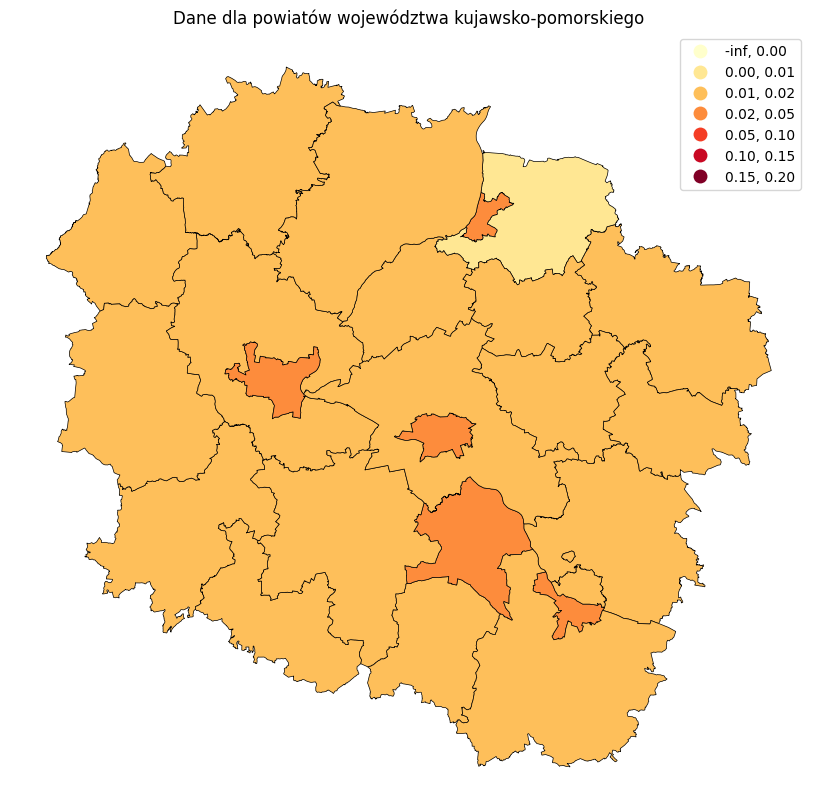

In [1176]:
merged_pow_pod = pow_pod_m.merge(pow_pod, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow_pod['Kategoria'] = np.digitize(
    merged_pow_pod['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow_pod.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów województwa kujawsko-pomorskiego')
plt.show()

In [1177]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow_pod)
w.transform = 'r'

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\1174686659.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow_pod)


In [1178]:
y = merged_pow_pod[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: -0.15846637507085587
E(I): -0.045454545454545456
Var(I): 0.018674787695428886
Z(I): -0.8269820239323149
p-value: 0.408247250319814


In [1179]:
geary_pow_pod = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)  

Geary's C: 0.8458552185288954
E(C): 1.0
Var(C): 0.027158612362693957
Z(C): -0.9353519116622369
p-value: 0.174803485327801


In [1180]:
g_pow_pod = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)   

G: 0.17998000975135053
E(G): 0.19523809523809524
Var(G): 5.365273332443715e-05
Z(G): -2.0830712160011227
p-value: 0.018622366309268168


In [1181]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

Local G* values: [-0.25648347  0.4920798  -0.06855136  0.31253882 -0.34974491 -0.87257006
 -0.76612416 -0.35737109 -0.42372843 -0.99842045 -0.4358713  -0.20308421
 -0.30916704  0.02715774 -0.06099346 -0.30202043 -0.39938777 -0.56654523
 -0.54477766 -0.32728898 -0.45144254  0.15644197  0.87959371]


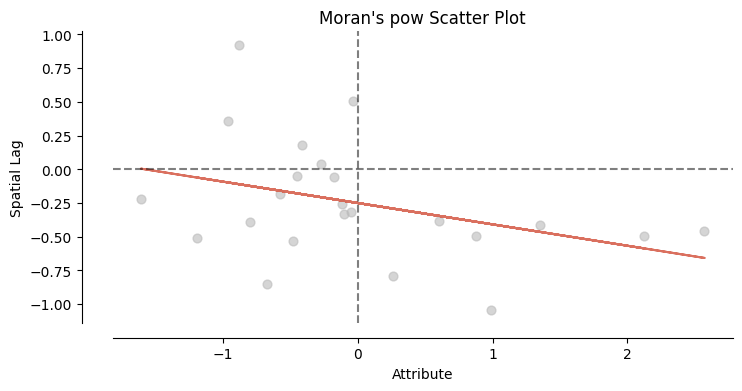

In [1182]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

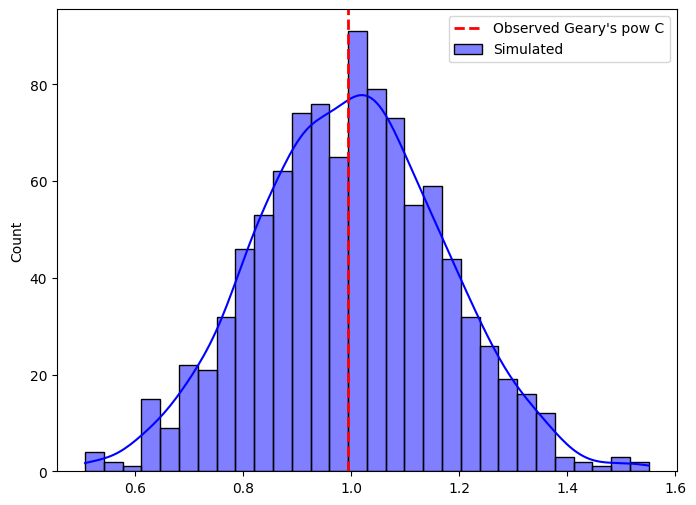

In [1183]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_pod.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_pod.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

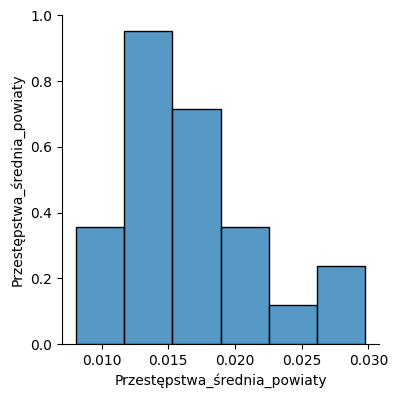

In [1184]:
sns.pairplot(pow_pod, height=4)  
plt.show()

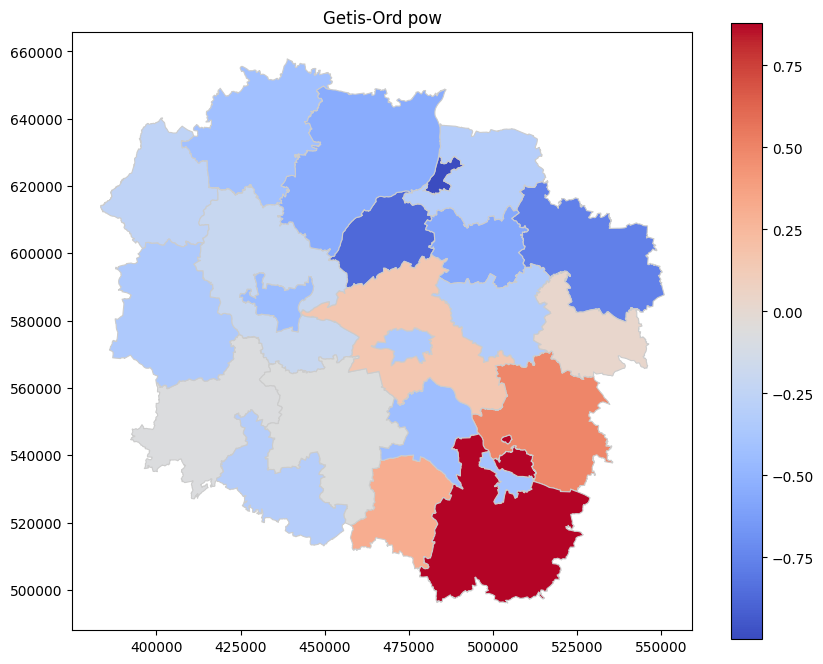

In [1185]:
merged_pow_pod['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_pod.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

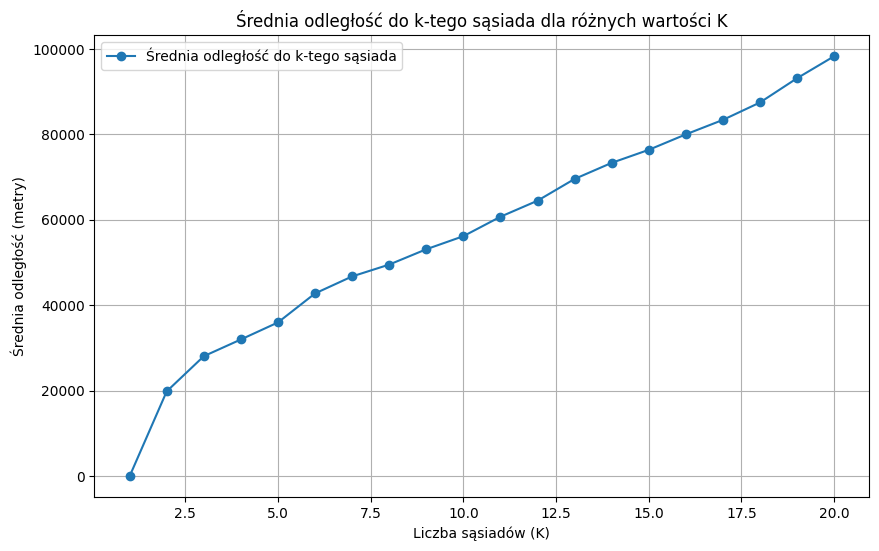

In [1186]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Wyciągnięcie współrzędnych centroidów
centroids = merged_pow_pod.geometry.centroid
coords = np.array([[point.x, point.y] for point in centroids])

# Zakres wartości K
k_values = range(1, 21)  

avg_distances = []

for k in k_values:
 
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(coords)
    
  
    distances, indices = knn.kneighbors(coords)
    
   
    avg_distance = np.mean(distances[:, -1])  
    avg_distances.append(avg_distance)


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_distances, marker='o', label='Średnia odległość do k-tego sąsiada')
plt.xlabel('Liczba sąsiadów (K)')
plt.ylabel('Średnia odległość (metry)')
plt.title('Średnia odległość do k-tego sąsiada dla różnych wartości K')
plt.grid(True)
plt.legend()
plt.show()


In [1187]:
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np


data_column = 'Przestępstwa_średnia_powiaty'
k = 7
w_knn = KNN.from_dataframe(merged_pow_pod, k=k)

y_knn = merged_pow_pod[data_column]

In [1188]:
y_knn = merged_pow_pod[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm) 

Moran's I: -0.030594525238544747
E(I): -0.045454545454545456
Var(I): 0.0067128899709362755
Z(I): 0.18136965873325825
p-value: 0.8560774327231306


In [1189]:
geary_pow_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)        
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm) 

Geary's C: 0.9961266794958296
E(C): 1.0
Var(C): 0.010062626184689331
Z(C): -0.03861248611651246
p-value: 0.4845996736180145


In [1190]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)   

G: 0.3263058922494734
E(G): 0.3181818181818182
Var(G): 8.750293012396715e-05
Z(G): 0.8684855084617363
p-value: 0.19256430107395361


In [1191]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [-0.21320074  0.61041523  0.13014094  0.65672817 -0.15438002 -0.30142126
 -0.35725798  0.12882887  0.05349622 -0.55513877  0.33379901 -0.17097592
  0.32671881  0.32958764  0.339197   -0.3142672   0.34015969 -0.08218426
 -0.43873234  0.25077804 -0.00699805  0.29244861  0.59423246]


In [1192]:
results_knn = pd.DataFrame({"Statystyka": ["Moran's I", "Geary's C", "Getis-Ord G"],
                            "Wartość": [moran_pow_knn.I, geary_pow_knn.C, g_pow_knn.G],
                            "Wartość oczekiwana": [moran_pow_knn.EI, geary_pow_knn.EC, g_pow_knn.EG],
                            "Wariancja": [moran_pow_knn.VI_norm, geary_pow_knn.VC_norm, g_pow_knn.VG],
                            "Z-score": [moran_pow_knn.z_norm, geary_pow_knn.z_norm, g_pow_knn.z_norm],
                            "p-value": [moran_pow_knn.p_norm, geary_pow_knn.p_norm, g_pow_knn.p_norm]})
print(results_knn)
df_results_knn = pd.DataFrame(results_knn)
output_csv_path_knn3 = "spatial_statistics_summary_knn_pod.csv"
df_results_knn.to_csv(output_csv_path_knn3, index=False)
print(f"Wyniki zapisano do pliku CSV: {output_csv_path_knn3}")

    Statystyka   Wartość  Wartość oczekiwana  Wariancja   Z-score   p-value
0    Moran's I -0.030595           -0.045455   0.006713  0.181370  0.856077
1    Geary's C  0.996127            1.000000   0.010063 -0.038612  0.484600
2  Getis-Ord G  0.326306            0.318182   0.000088  0.868486  0.192564
Wyniki zapisano do pliku CSV: spatial_statistics_summary_knn_pod.csv


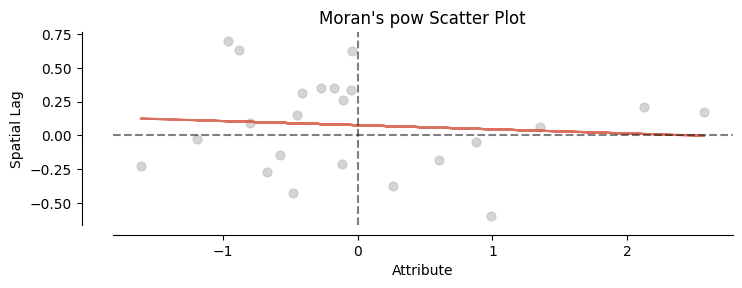

In [1193]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

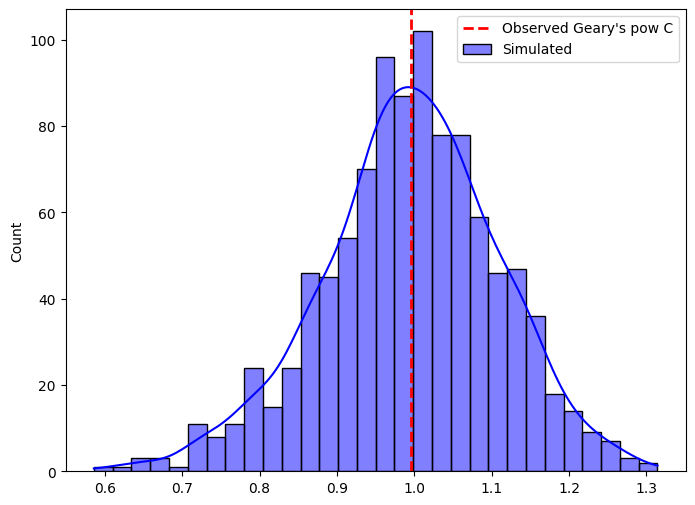

In [1194]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

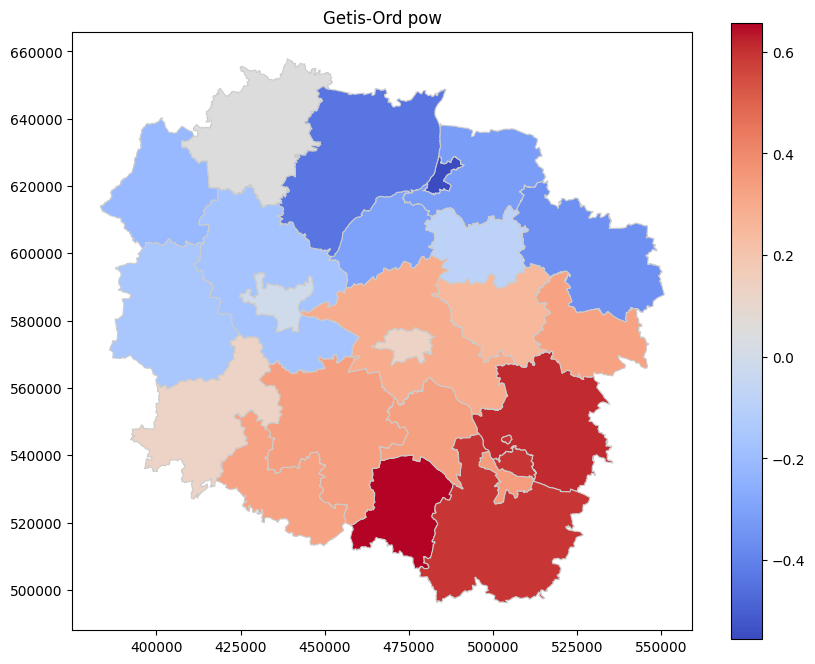

In [1195]:
merged_pow_pod['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_pod.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

Analiza przy użyciu macierzy wag opartych na odległości

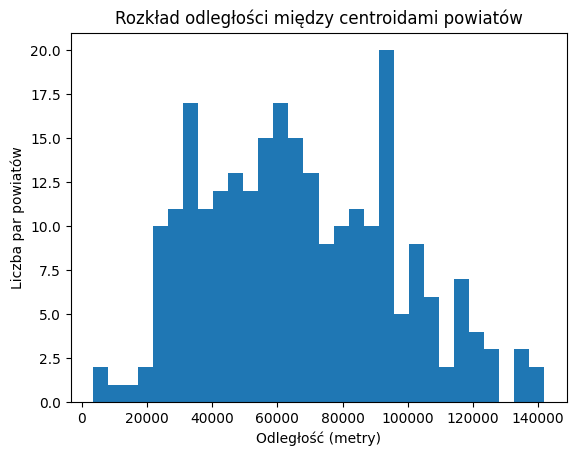

In [1196]:
from scipy.spatial.distance import pdist
import numpy as np

# Wyciągnięcie centroidów powiatów
centroids = merged_pow_pod.geometry.centroid

# Obliczenie macierzy odległości między centroidami
coords = np.array([[point.x, point.y] for point in centroids])
distances = pdist(coords)

# Wykres histogramu odległości
plt.hist(distances, bins=30)
plt.xlabel('Odległość (metry)')
plt.ylabel('Liczba par powiatów')
plt.title('Rozkład odległości między centroidami powiatów')
plt.show()

In [1197]:
import numpy as np
from libpysal.weights import DistanceBand

max_dist = merged_pow_pod.geometry.centroid.distance(merged_pow_pod.geometry.centroid.unary_union).max()

threshold_distance = 100000 

w_distance = DistanceBand.from_dataframe(merged_pow_pod, threshold=threshold_distance, binary=True, silence_warnings=True)
w_distance.transform = 'r'

moran_distance = Moran(y, w_distance)
print("Moran's I (distance-based weights):", moran_distance.I)
print("E(I):", moran_distance.EI)
print("Var(I):", moran_distance.VI_norm)
print("Z(I):", moran_distance.z_norm)
print("p-value (normal approximation):", moran_distance.p_norm)


geary_distance = Geary(y, w_distance)
print("Geary's C (distance-based weights):", geary_distance.C)
print("E(C):", geary_distance.EC)
print("Var(C):", geary_distance.VC_norm)
print("Z(C):", geary_distance.z_norm)
print("p-value (normal approximation):", geary_distance.p_norm)

g_distance = G(y, w_distance)
print("Getis-Ord G (distance-based weights):", g_distance.G)
print("E(G):", g_distance.EG)
print("Var(G):", g_distance.VG)
print("Z(G):", g_distance.z_norm)
print("p-value (normal approximation):", g_distance.p_norm)

Moran's I (distance-based weights): -0.055994398420577775
E(I): -0.045454545454545456
Var(I): 0.0006704875098151311
Z(I): -0.4070419839190566
p-value (normal approximation): 0.6839771528288876
Geary's C (distance-based weights): 1.0129199988074205
E(C): 1.0
Var(C): 0.0011771520100600143
Z(C): 0.3765704170218665
p-value (normal approximation): 0.3532464379154855
Getis-Ord G (distance-based weights): 0.8649055559656768
E(G): 0.8537549407114624
Var(G): 0.00025455409644536964
Z(G): 0.6988899345692933
p-value (normal approximation): 0.24231040915446578


C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\2201500884.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_dist = merged_pow_pod.geometry.centroid.distance(merged_pow_pod.geometry.centroid.unary_union).max()


Analiza z wykorzystaniem testów permutacyjnych i różnych macierzy wag

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

In [1198]:
y = merged_pow_pod[data_column]
w = weights.KNN.from_dataframe(merged_pow_pod, k=7) 
moran_pow_knn_perm = Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_knn_perm.I)
print("E(I):", moran_pow_knn_perm.EI)
print("Var(I):", moran_pow_knn_perm.VI_norm)
print("Z(I):", moran_pow_knn_perm.z_norm)
print("p-value:", moran_pow_knn_perm.p_norm)  

Moran's I (z permutacjami): -0.030594525238544747
E(I): -0.045454545454545456
Var(I): 0.0067128899709362755
Z(I): 0.18136965873325825
p-value: 0.8560774327231306


In [1199]:
y = merged_pow_pod[data_column]
w = weights.KNN.from_dataframe(merged_pow_pod, k=7)
geary_pow_knn_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_knn_perm.C)
print("E(C):", geary_pow_knn_perm.EC)
print("Var(C):", geary_pow_knn_perm.VC_norm)
print("Z(C):", geary_pow_knn_perm.z_norm)
print("p-value:", geary_pow_knn_perm.p_norm) 

Geary's C (z permutacjami): 0.9961266794958296
E(C): 1.0
Var(C): 0.010062626184689331
Z(C): -0.03861248611651246
p-value: 0.4845996736180145


In [1200]:
y = merged_pow_pod[data_column]
w = weights.KNN.from_dataframe(merged_pow_pod, k=7)  

g_pow_knn_perm = G(y, w, permutations=1000)
print("G (z permutacjami):", g_pow_knn_perm.G)
print("E(G):", g_pow_knn_perm.EG)
print("Var(G):", g_pow_knn_perm.VG)
print("Z(G):", g_pow_knn_perm.z_norm)
print("p-value:", g_pow_knn_perm.p_norm)  

G (z permutacjami): 0.3263058922494734
E(G): 0.3181818181818182
Var(G): 8.750293012396715e-05
Z(G): 0.8684855084617363
p-value: 0.19256430107395361


Analiza przy użyciu binarnej macierzy sąsiedztwa

In [1201]:
y = merged_pow_pod[data_column]

moran_pow_queen_perm= Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_queen_perm.I)
print("E(I):", moran_pow_queen_perm.EI)
print("Var(I):", moran_pow_queen_perm.VI_norm)
print("Z(I):", moran_pow_queen_perm.z_norm)
print("p-value:", moran_pow_queen_perm.p_norm) 

Moran's I (z permutacjami): -0.030594525238544747
E(I): -0.045454545454545456
Var(I): 0.0067128899709362755
Z(I): 0.18136965873325825
p-value: 0.8560774327231306


In [1202]:
geary_pow_queen_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_queen_perm.C)
print("E(C):", geary_pow_queen_perm.EC)
print("Var(C):", geary_pow_queen_perm.VC_norm)
print("Z(C):", geary_pow_queen_perm.z_norm)
print("p-value:", geary_pow_queen_perm.p_norm) 

Geary's C (z permutacjami): 0.9961266794958296
E(C): 1.0
Var(C): 0.010062626184689331
Z(C): -0.03861248611651246
p-value: 0.4845996736180145


In [1203]:
g_pow_queen_perm = G(y, w, permutations=1000)

print("G (z permutacjami):", g_pow_queen_perm.G)
print("E(G):", g_pow_queen_perm.EG)
print("Var(G):", g_pow_queen_perm.VG)
print("Z(G):", g_pow_queen_perm.z_norm)
print("p-value:", g_pow_queen_perm.p_norm) 

G (z permutacjami): 0.3263058922494734
E(G): 0.3181818181818182
Var(G): 8.750293012396715e-05
Z(G): 0.8684855084617363
p-value: 0.19256430107395361


Analiza przy użyciu macierzy wag opartych na odległości

In [1204]:
y=merged_pow_pod[data_column]
threshold_distance = 30000  # w metrach (30 km)
w_distance = DistanceBand.from_dataframe(
    merged_pow_pod, 
    threshold=threshold_distance, 
    binary=True, 
    silence_warnings=True
)
w_distance.transform = 'r'
moran_pow_distance_perm = Moran(y, w_distance, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_distance_perm.I)
print("E(I):", moran_pow_distance_perm.EI)
print("Var(I):", moran_pow_distance_perm.VI_norm)
print("Z(I):", moran_pow_distance_perm.z_norm)
print("p-value:", moran_pow_distance_perm.p_norm)

Moran's I (z permutacjami): -0.0299001315626639
E(I): -0.045454545454545456
Var(I): 0.04199955401553412
Z(I): 0.07589817122897559
p-value: 0.9395001118124915


In [1205]:
geary_pow_distance_perm = Geary(y, w_distance, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_distance_perm.C)
print("E(C):", geary_pow_distance_perm.EC)
print("Var(C):", geary_pow_distance_perm.VC_norm)
print("Z(C):", geary_pow_distance_perm.z_norm)
print("p-value:", geary_pow_distance_perm.p_norm)

Geary's C (z permutacjami): 1.1889897429248113
E(C): 1.0
Var(C): 0.05627690972222224
Z(C): 0.7966601863717989
p-value: 0.21282420625790377


In [1206]:
getis_pow_distance_perm = G(y, w_distance, permutations=1000)
print("Getis-Ord G (z permutacjami):", getis_pow_distance_perm.G)
print("E(G):", getis_pow_distance_perm.EG)
print("Var(G):", getis_pow_distance_perm.VG)
print("Z(G):", getis_pow_distance_perm.z_norm)
print("p-value:", getis_pow_distance_perm.p_norm)

Getis-Ord G (z permutacjami): 0.11096083585778464
E(G): 0.09881422924901186
Var(G): 6.871269823005913e-05
Z(G): 1.4653334540678327
p-value: 0.07141498173497285
